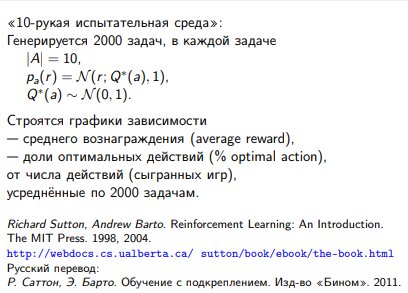

In [1]:
# import numpy as np
# from numpy import random as rng

In [7]:
# rng.normal?
# #(size=10)

In [8]:
# num_actions = 10

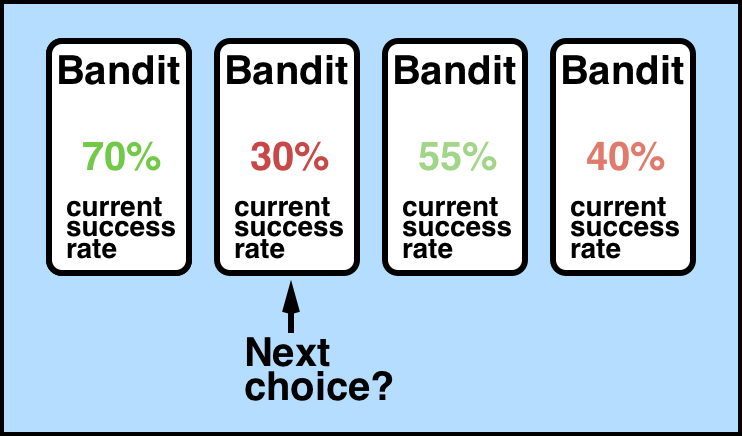

https://towardsdatascience.com/solving-the-multi-armed-bandit-problem-b72de40db97c

https://github.com/ankonzoid/LearningX/tree/master/classical_RL/multiarmed_bandit

In [10]:
# https://pythobyte.com/introduction-to-reinforcement-learning-with-python-928c0044/
    
import numpy as np

# Number of bandits
k = 3

# Our action values
Q = [0 for _ in range(k)]

# This is to keep track of the number of times we take each action
N = [0 for _ in range(k)]

# Epsilon value for exploration
eps = 0.1

# True probability of winning for each bandit
p_bandits = [0.45, 0.40, 0.80]

def pull(a):
    """Pull arm of bandit with index `i` and return 1 if win, 
    else return 0."""
    if np.random.rand() < p_bandits[a]:  return 1
    return 0

# while True:
for i in range(100):
    
    if np.random.rand() > eps:
        # Take greedy action most of the time
        a = np.argmax(Q)
    else:
        # Take random action with probability eps
        a = np.random.randint(0, k)
    
    # Collect reward
    reward = pull(a)
    
    # Incremental average
    N[a] += 1
    Q[a] += 1/N[a] * (reward - Q[a])

In [ ]:
# # https://conrmcdonald.medium.com/solving-multiarmed-bandits-a-comparison-of-epsilon-greedy-and-thompson-sampling-d97167ca9a50
# # https://habr.com/ru/post/425619/
    


# class Environment:
#     def __init__(self, variants, payouts, n_trials, variance=False):
#         self.variants = variants
#         if variance:
#             self.payouts = np.clip(payouts + np.random.normal(0, 0.04, size=len(variants)), 0, .2)
#         else:
#             self.payouts = payouts
#         #self.payouts[5] = self.payouts[5] if i < n_trials/2 else 0.1
#         self.n_trials = n_trials
#         self.total_reward = 0
#         self.n_k = len(variants)
#         self.shape = (self.n_k, n_trials)
        
#     def run(self, agent):
#         """Run the simulation with the agent. 
#         agent must be a class with choose_k and update methods."""
        
#         for i in range(self.n_trials):
#             # agent makes a choice
#             x_chosen = agent.choose_k()
#             # Environment returns reward
#             reward = np.random.binomial(1, p=self.payouts[x_chosen])
#             # agent learns of reward
#             agent.reward = reward
#             # agent updates parameters based on the data
#             agent.update()
#             self.total_reward += reward
        
#         agent.collect_data()
        
#         return self.total_reward
        
        
# class BaseSampler:    
#     def __init__(self, env, n_samples=None, n_learning=None, e=0.05):
#         self.env = env
#         self.shape = (env.n_k, n_samples)
#         self.variants = env.variants
#         self.n_trials = env.n_trials
#         self.payouts = env.payouts
#         self.ad_i = np.zeros(env.n_trials)
#         self.r_i = np.zeros(env.n_trials)
#         self.thetas = np.zeros(self.n_trials)
#         self.regret_i = np.zeros(env.n_trials)
#         self.thetaregret = np.zeros(self.n_trials)
        
#         self.a = np.ones(env.n_k) 
#         self.b = np.ones(env.n_k) 
#         self.theta = np.zeros(env.n_k)
#         self.data = None
#         self.reward = 0
#         self.total_reward = 0
#         self.k = 0
#         self.i = 0
        
#         self.n_samples = n_samples
#         self.n_learning = n_learning
#         self.e = e
#         self.ep = np.random.uniform(0, 1, size=env.n_trials)
#         self.exploit = (1 - e)
        
#     def collect_data(self):
        
#         self.data = pd.DataFrame(dict(ad=self.ad_i, reward=self.r_i, regret=self.regret_i))
            
            
# variants = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# payouts = [0.023, 0.03, 0.029, 0.001, 0.05, 0.06, 0.0234, 0.035, 0.01, 0.11]

# class RandomSampler(BaseSampler):
#     def __init__(self, env):
#         super().__init__(env)
        
#     def choose_k(self):
        
#         self.k = np.random.choice(self.variants)
        
#         return self.k
    
#     def update(self):
#         # nothing to update
#         #self.thetaregret[self.i] = self.thetaregret[self.i]
#         #self.regret_i[self.i] = np.max(self.thetaregret) - self.theta[self.k]
#         #self.thetas[self.i] = self.theta[self.k]
#         self.thetaregret[self.i] = np.max(self.theta) - self.theta[self.k]
        
#         self.a[self.k] += self.reward
#         self.b[self.k] += 1
#         self.theta = self.a/self.b

#         self.ad_i[self.i] = self.k
#         self.r_i[self.i] = self.reward
#         self.i += 1
            
            
# en0 = Environment(machines, payouts, n_trials=10000)
# rs = RandomSampler(env=en0)
# en0.run(agent=rs)


# class eGreedy(BaseSampler):

#     def __init__(self, env, n_learning, e):
#         super().__init__(env, n_learning, e)
        
#     def choose_k(self):

#         # e% of the time take a random draw from machines
#         # random k for n learning trials, then the machine with highest theta
#         self.k = np.random.choice(self.variants) if self.i < self.n_learning else np.argmax(self.theta)
#         # with 1 - e probability take a random sample (explore) otherwise exploit
#         self.k = np.random.choice(self.variants) if self.ep[self.i] > self.exploit else self.k
#         return self.k
#         # every 100 trials update the successes

#         # update the count of successes for the chosen machine
#     def update(self):
        
#         # update the probability of payout for each machine
#         self.a[self.k] += self.reward
#         self.b[self.k] += 1
#         self.theta = self.a/self.b

#         #self.total_reward += self.reward
#         #self.regret_i[self.i] = np.max(self.theta) - self.theta[self.k]
#         #self.thetaregret[self.i] = self.thetaregret[self.i]
#         self.thetas[self.i] = self.theta[self.k]
#         self.thetaregret[self.i] = np.max(self.thetas) - self.theta[self.k]
 
#         self.ad_i[self.i] = self.k
#         self.r_i[self.i] = self.reward
#         self.i += 1
            
            
# en1 = Environment(machines, payouts, n_trials)
# eg = eGreedy(env=en1, n_learning=500, e=0.1)
# en1.run(agent=eg)
    
# class ThompsonSampler(BaseSampler):

#     def __init__(self, env):
#         super().__init__(env)
        
#     def choose_k(self):
#         # sample from posterior (this is the thompson sampling approach)
#         # this leads to more exploration because machines with > uncertainty can then be selected as the machine
#         self.theta = np.random.beta(self.a, self.b)
#         # select machine with highest posterior p of payout
#         self.k = self.variants[np.argmax(self.theta)]
#         #self.k = np.argmax(self.a/(self.a + self.b))
#         return self.k
    
#     def update(self):
       
#         #update dist (a, b) = (a, b) + (r, 1 - r) 
#         self.a[self.k] += self.reward
#         self.b[self.k] += 1 - self.reward # i.e. only increment b when it's a swing and a miss. 1 - 0 = 1, 1 - 1 = 0
        
#         #self.thetaregret[self.i] = self.thetaregret[self.i]
#         #self.regret_i[self.i] = np.max(self.theta) - self.theta[self.k]
#         self.thetas[self.i] = self.theta[self.k]
#         self.thetaregret[self.i] = np.max(self.thetas) - self.theta[self.k]

#         self.ad_i[self.i] = self.k
#         self.r_i[self.i] = self.reward
#         self.i += 1    
            
            
# en2 = Environment(machines, payouts, n_trials)
# tsa = ThompsonSampler(env=en2)
# en2.run(agent=tsa)   